In [41]:
import pandas as pd

In [42]:
df = pd.read_csv("Data/daily-min-temperatures.csv", index_col=0, parse_dates=True)
df

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5


In [43]:
type(df)

pandas.core.frame.DataFrame

In [44]:
df["month"]= df.index.month
df["day"]=df.index.day

In [45]:
df

,Temp,month,day
Date,,,
1981-01-01,20.7,1,1
1981-01-02,17.9,1,2
1981-01-03,18.8,1,3
1981-01-04,14.6,1,4
1981-01-05,15.8,1,5
...,...,...,...
1990-12-27,14.0,12,27
1990-12-28,13.6,12,28
1990-12-29,13.5,12,29


In [46]:
df["shifted"]=df.Temp.shift(1)
df

,Temp,month,day,shifted
Date,,,,
1981-01-01,20.7,1,1,NaN
1981-01-02,17.9,1,2,20.7
1981-01-03,18.8,1,3,17.9
1981-01-04,14.6,1,4,18.8
1981-01-05,15.8,1,5,14.6
...,...,...,...,...
1990-12-27,14.0,12,27,14.6
1990-12-28,13.6,12,28,14.0
1990-12-29,13.5,12,29,13.6


In [47]:
from pandas import Grouper
import matplotlib.pyplot as plt

series = pd.read_csv('Data/daily-min-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
groups = series.groupby(Grouper(freq='A'))
years = pd.DataFrame()
for name, group in groups:
    years[name.year] = group.values

years    

,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990
0,20.7,17.0,18.4,19.5,13.3,12.9,12.3,15.3,14.3,14.8
1,17.9,15.0,15.0,17.1,15.2,13.8,13.8,14.3,17.4,13.3
2,18.8,13.5,10.9,17.1,13.1,10.6,15.3,13.5,18.5,15.6
3,14.6,15.2,11.4,12.0,12.7,12.6,15.6,15.0,16.8,14.5
4,15.8,13.0,14.8,11.0,14.6,13.7,16.2,13.6,11.5,14.3
...,...,...,...,...,...,...,...,...,...,...
360,15.5,15.3,13.9,12.2,11.5,14.6,16.2,9.5,13.3,14.0
361,13.3,16.3,11.1,12.0,10.8,14.2,14.2,12.9,11.7,13.6
362,15.6,15.8,16.1,12.6,12.0,13.2,14.3,12.9,10.4,13.5
363,15.2,17.7,20.4,16.0,16.3,11.7,13.3,14.8,14.4,15.7


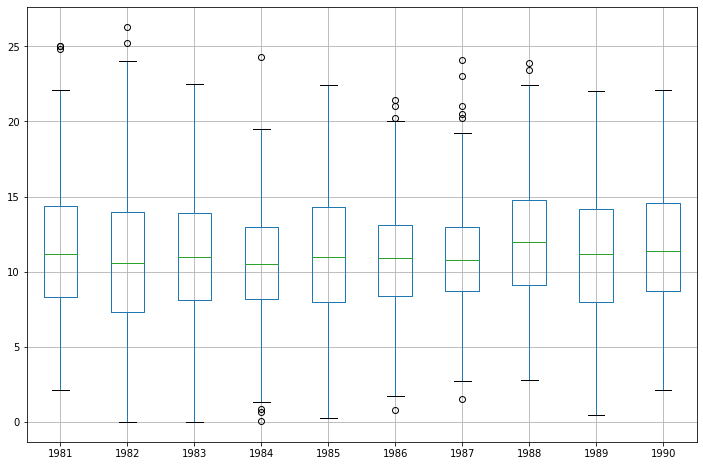

In [48]:
years.boxplot(figsize=(12,8))
plt.show()

In [49]:
# Alternatively

df = pd.read_csv('Data/daily-min-temperatures.csv', index_col=0, parse_dates=True)

df["year"]=df.index.year

df.head()

,Temp,year
Date,,
1981-01-01,20.7,1981
1981-01-02,17.9,1981
1981-01-03,18.8,1981
1981-01-04,14.6,1981
1981-01-05,15.8,1981


In [50]:
df_1 = df.pivot_table(index=df.groupby("year")["Temp"].cumcount(), columns='year', values="Temp")
df_1

year,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990
0,20.7,17.0,18.4,19.5,13.3,12.9,12.3,15.3,14.3,14.8
1,17.9,15.0,15.0,17.1,15.2,13.8,13.8,14.3,17.4,13.3
2,18.8,13.5,10.9,17.1,13.1,10.6,15.3,13.5,18.5,15.6
3,14.6,15.2,11.4,12.0,12.7,12.6,15.6,15.0,16.8,14.5
4,15.8,13.0,14.8,11.0,14.6,13.7,16.2,13.6,11.5,14.3
...,...,...,...,...,...,...,...,...,...,...
360,15.5,15.3,13.9,12.2,11.5,14.6,16.2,9.5,13.3,14.0
361,13.3,16.3,11.1,12.0,10.8,14.2,14.2,12.9,11.7,13.6
362,15.6,15.8,16.1,12.6,12.0,13.2,14.3,12.9,10.4,13.5
363,15.2,17.7,20.4,16.0,16.3,11.7,13.3,14.8,14.4,15.7


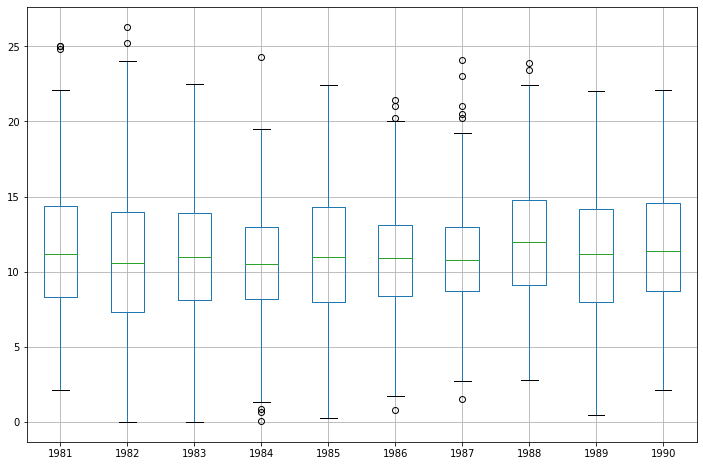

In [51]:
df_1.boxplot(figsize=(12,8))
plt.show()

* Across intervals, in this case
years, we can look for multiple year trends, seasonality, and other structural information that
could be modeled.

#### distribution of values across months within 1990

In [52]:
df_2 = pd.read_csv('Data/daily-min-temperatures.csv', index_col=0, parse_dates=True)
df_2 = df_2["1990"]
df_2.head()

,Temp
Date,
1990-01-01,14.8
1990-01-02,13.3
1990-01-03,15.6
1990-01-04,14.5
1990-01-05,14.3


In [53]:
df_2["month"] = df_2.index.month

In [54]:
df_3 = df_2.pivot_table(index=df_2.groupby("month")["Temp"].cumcount(), columns='month', values="Temp")
df_3

month,1,2,3,4,5,6,7,8,9,10,11,12
0,14.8,12.0,19.3,15.3,13.0,9.7,7.4,6.8,6.0,11.3,15.4,13.3
1,13.3,12.2,17.3,14.7,13.9,8.2,7.3,9.8,9.5,10.5,11.8,13.2
2,15.6,14.8,19.0,11.0,12.6,8.4,7.7,5.7,8.6,9.9,13.0,16.2
3,14.5,14.8,19.8,12.2,14.3,8.5,7.7,8.6,7.6,11.0,11.1,17.3
4,14.3,14.4,19.3,14.2,16.0,10.4,9.3,10.6,10.4,14.0,12.5,20.5
5,15.3,12.9,17.2,17.0,13.3,6.8,4.4,7.8,10.3,9.2,18.3,20.2
6,16.4,13.4,14.2,15.8,7.0,6.0,5.7,7.7,7.5,9.8,19.2,19.4
7,14.8,15.9,10.3,15.2,4.9,6.6,10.2,8.6,3.0,6.0,15.4,15.5
8,17.4,16.1,13.0,15.1,6.9,7.8,10.2,6.5,5.3,9.8,13.1,14.1
9,18.8,17.6,15.3,14.7,13.7,10.3,9.3,6.9,10.5,9.2,11.5,11.0


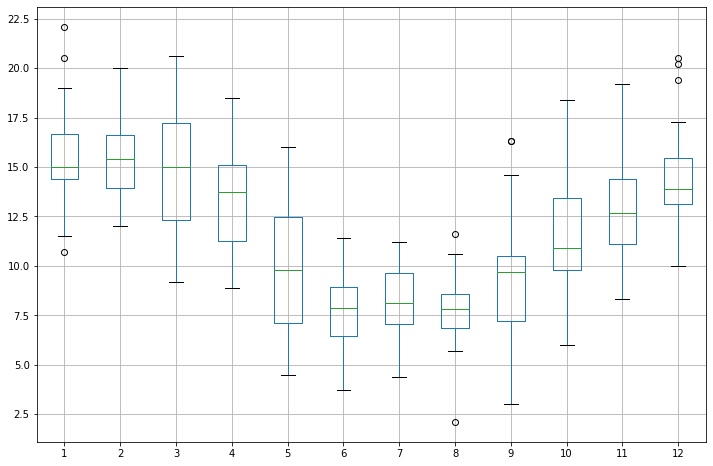

In [55]:
df_3.boxplot(figsize=(12,8))
plt.show()

### Heat Maps

In [56]:
series = pd.read_csv('Data/daily-min-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
groups = series.groupby(Grouper(freq='A'))
years = pd.DataFrame()
for name, group in groups:
    years[name.year] = group.values
years = years.T
years

,0,1,2,3,4,5,6,7,8,9,...,355,356,357,358,359,360,361,362,363,364
1981,20.7,17.9,18.8,14.6,15.8,15.8,15.8,17.4,21.8,20.0,...,15.0,12.8,15.0,14.2,14.0,15.5,13.3,15.6,15.2,17.4
1982,17.0,15.0,13.5,15.2,13.0,12.5,14.1,14.8,16.2,15.8,...,10.8,15.6,15.3,13.9,13.0,15.3,16.3,15.8,17.7,16.3
1983,18.4,15.0,10.9,11.4,14.8,12.1,12.8,16.2,15.5,13.0,...,12.2,16.7,13.8,17.5,15.0,13.9,11.1,16.1,20.4,18.0
1984,19.5,17.1,17.1,12.0,11.0,16.3,16.1,13.0,13.4,15.2,...,14.2,11.4,13.7,16.5,12.8,12.2,12.0,12.6,16.0,16.4
1985,13.3,15.2,13.1,12.7,14.6,11.0,13.2,12.2,14.4,13.7,...,13.7,12.0,13.1,13.2,13.3,11.5,10.8,12.0,16.3,14.4
1986,12.9,13.8,10.6,12.6,13.7,12.6,13.1,15.4,11.9,13.8,...,11.6,9.7,13.4,10.5,14.7,14.6,14.2,13.2,11.7,17.2
1987,12.3,13.8,15.3,15.6,16.2,16.3,16.8,11.0,8.5,13.2,...,11.2,11.4,11.2,12.1,12.7,16.2,14.2,14.3,13.3,16.7
1988,15.3,14.3,13.5,15.0,13.6,15.2,17.0,18.7,16.5,17.4,...,11.9,15.2,17.3,19.8,15.8,9.5,12.9,12.9,14.8,14.1
1989,14.3,17.4,18.5,16.8,11.5,9.5,12.2,15.7,16.3,13.6,...,11.8,12.0,12.7,16.4,16.0,13.3,11.7,10.4,14.4,12.7
1990,14.8,13.3,15.6,14.5,14.3,15.3,16.4,14.8,17.4,18.8,...,13.2,13.9,10.0,12.9,14.6,14.0,13.6,13.5,15.7,13.0


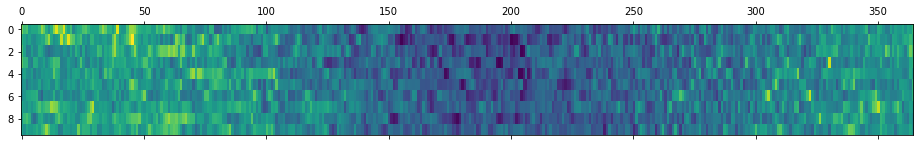

In [57]:
plt.matshow(years, interpolation=None, aspect='auto')
plt.show()

In [58]:
### Alternatively

df_4 = pd.read_csv('Data/daily-min-temperatures.csv', index_col=0, parse_dates=True)

df_4["year"]=df_4.index.year
df_4

,Temp,year
Date,,
1981-01-01,20.7,1981
1981-01-02,17.9,1981
1981-01-03,18.8,1981
1981-01-04,14.6,1981
1981-01-05,15.8,1981
...,...,...
1990-12-27,14.0,1990
1990-12-28,13.6,1990
1990-12-29,13.5,1990


In [59]:
df_5 = df_4.pivot_table(index=df_4.year, columns= df_4.groupby("year")["Temp"].cumcount(), values="Temp")
df_5

,0,1,2,3,4,5,6,7,8,9,...,355,356,357,358,359,360,361,362,363,364
year,,,,,,,,,,,,,,,,,,,,,
1981,20.7,17.9,18.8,14.6,15.8,15.8,15.8,17.4,21.8,20.0,...,15.0,12.8,15.0,14.2,14.0,15.5,13.3,15.6,15.2,17.4
1982,17.0,15.0,13.5,15.2,13.0,12.5,14.1,14.8,16.2,15.8,...,10.8,15.6,15.3,13.9,13.0,15.3,16.3,15.8,17.7,16.3
1983,18.4,15.0,10.9,11.4,14.8,12.1,12.8,16.2,15.5,13.0,...,12.2,16.7,13.8,17.5,15.0,13.9,11.1,16.1,20.4,18.0
1984,19.5,17.1,17.1,12.0,11.0,16.3,16.1,13.0,13.4,15.2,...,14.2,11.4,13.7,16.5,12.8,12.2,12.0,12.6,16.0,16.4
1985,13.3,15.2,13.1,12.7,14.6,11.0,13.2,12.2,14.4,13.7,...,13.7,12.0,13.1,13.2,13.3,11.5,10.8,12.0,16.3,14.4
1986,12.9,13.8,10.6,12.6,13.7,12.6,13.1,15.4,11.9,13.8,...,11.6,9.7,13.4,10.5,14.7,14.6,14.2,13.2,11.7,17.2
1987,12.3,13.8,15.3,15.6,16.2,16.3,16.8,11.0,8.5,13.2,...,11.2,11.4,11.2,12.1,12.7,16.2,14.2,14.3,13.3,16.7
1988,15.3,14.3,13.5,15.0,13.6,15.2,17.0,18.7,16.5,17.4,...,11.9,15.2,17.3,19.8,15.8,9.5,12.9,12.9,14.8,14.1
1989,14.3,17.4,18.5,16.8,11.5,9.5,12.2,15.7,16.3,13.6,...,11.8,12.0,12.7,16.4,16.0,13.3,11.7,10.4,14.4,12.7


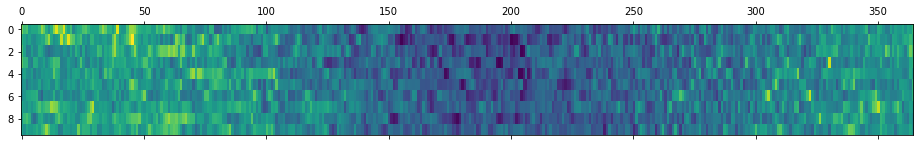

In [60]:
plt.matshow(df_5, interpolation=None, aspect='auto')
plt.show()

* The plot shows the cooler minimum temperatures in the middle days of the years and
the warmer minimum temperatures in the start and ends of the years, and all the fading and
complexity in between.

#### heat map comparing the months of the year in 1990

In [61]:
df_6 = pd.read_csv('Data/daily-min-temperatures.csv', index_col=0, parse_dates=True)
df_6 = df_6["1990"]
df_6.head()

,Temp
Date,
1990-01-01,14.8
1990-01-02,13.3
1990-01-03,15.6
1990-01-04,14.5
1990-01-05,14.3


In [62]:
df_6["month"] = df_6.index.month

In [63]:
df_7 = df_6.pivot_table(index=df_6.month, columns= df_6.groupby("month")["Temp"].cumcount(), values="Temp")
df_7

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
month,,,,,,,,,,,,,,,,,,,,,
1,14.8,13.3,15.6,14.5,14.3,15.3,16.4,14.8,17.4,18.8,...,14.3,14.3,20.5,15.0,17.1,16.9,16.9,13.6,16.4,16.1
2,12.0,12.2,14.8,14.8,14.4,12.9,13.4,15.9,16.1,17.6,...,20.0,17.0,15.2,16.5,16.5,17.3,19.1,NaN,NaN,NaN
3,19.3,17.3,19.0,19.8,19.3,17.2,14.2,10.3,13.0,15.3,...,14.3,16.0,17.4,16.9,18.0,20.6,14.2,10.9,11.9,13.3
4,15.3,14.7,11.0,12.2,14.2,17.0,15.8,15.2,15.1,14.7,...,14.7,11.2,12.7,13.7,11.5,10.4,8.9,11.1,9.5,NaN
5,13.0,13.9,12.6,14.3,16.0,13.3,7.0,4.9,6.9,13.7,...,4.5,7.2,10.0,10.5,10.7,8.2,6.1,4.5,6.1,9.8
6,9.7,8.2,8.4,8.5,10.4,6.8,6.0,6.6,7.8,10.3,...,7.7,10.6,8.2,7.9,5.2,5.9,3.7,5.6,9.4,NaN
7,7.4,7.3,7.7,7.7,9.3,4.4,5.7,10.2,10.2,9.3,...,9.6,9.8,10.8,9.2,6.5,8.1,7.3,7.9,6.0,5.0
8,6.8,9.8,5.7,8.6,10.6,7.8,7.7,8.6,6.5,6.9,...,6.1,6.6,7.6,7.4,8.0,2.1,5.9,11.6,8.6,7.9
9,6.0,9.5,8.6,7.6,10.4,10.3,7.5,3.0,5.3,10.5,...,6.8,5.2,10.6,16.3,9.8,4.6,11.1,8.7,10.0,NaN


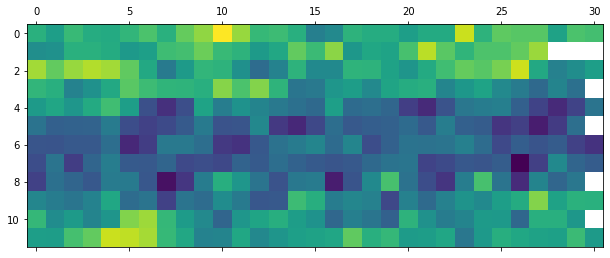

In [64]:
plt.matshow(df_7, interpolation=None, aspect='auto')
plt.show()

### Lag Scatter Plots

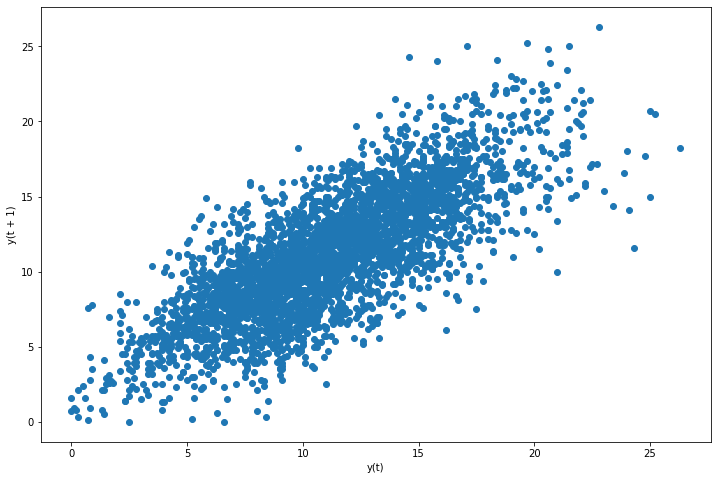

In [65]:
from pandas.plotting import lag_plot

series = pd.read_csv('Data/daily-min-temperatures.csv', header=0, index_col=0, parse_dates=True)

plt.figure(figsize=(12, 8))
lag_plot(series)

plt.show()

* The plot created from running the example shows a relatively strong positive correlation
between observations and their lag1 values.

#### scatter plot for the observation with each value in the previous seven days

In [66]:
# create multiple scatter plots
series = pd.read_csv('Data/daily-min-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

values = pd.DataFrame(series.values)
lags = 7

columns = [values]

for i in range(1,(lags + 1)):
    columns.append(values.shift(i))

dataframe = pd.concat(columns, axis=1)

columns = ['t']

for i in range(1,(lags + 1)):
    columns.append('t-' + str(i))
dataframe.columns = columns
dataframe

,t,t-1,t-2,t-3,t-4,t-5,t-6,t-7
0,20.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17.9,20.7,NaN,NaN,NaN,NaN,NaN,NaN
2,18.8,17.9,20.7,NaN,NaN,NaN,NaN,NaN
3,14.6,18.8,17.9,20.7,NaN,NaN,NaN,NaN
4,15.8,14.6,18.8,17.9,20.7,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
3645,14.0,14.6,12.9,10.0,13.9,13.2,13.1,15.4
3646,13.6,14.0,14.6,12.9,10.0,13.9,13.2,13.1
3647,13.5,13.6,14.0,14.6,12.9,10.0,13.9,13.2
3648,15.7,13.5,13.6,14.0,14.6,12.9,10.0,13.9


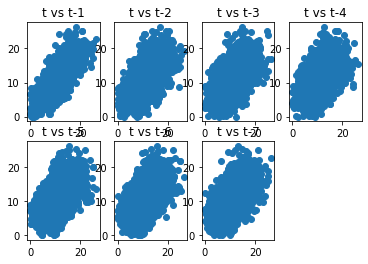

In [67]:
plt.figure(1)

for i in range(1,(lags + 1)):
    ax = plt.subplot(240 + i)
    ax.set_title('t vs t-' + str(i))
    plt.scatter(x=dataframe['t'].values, y=dataframe['t-'+str(i)].values)
plt.show()

In [68]:
### Alternatively

df = pd.read_csv('Data/daily-min-temperatures.csv', index_col=0, parse_dates=True)

for i in range(1,8):
    df["t - " + str(i)] = df.Temp.shift(i)
df

,Temp,t - 1,t - 2,t - 3,t - 4,t - 5,t - 6,t - 7
Date,,,,,,,,
1981-01-01,20.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981-01-02,17.9,20.7,NaN,NaN,NaN,NaN,NaN,NaN
1981-01-03,18.8,17.9,20.7,NaN,NaN,NaN,NaN,NaN
1981-01-04,14.6,18.8,17.9,20.7,NaN,NaN,NaN,NaN
1981-01-05,15.8,14.6,18.8,17.9,20.7,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
1990-12-27,14.0,14.6,12.9,10.0,13.9,13.2,13.1,15.4
1990-12-28,13.6,14.0,14.6,12.9,10.0,13.9,13.2,13.1
1990-12-29,13.5,13.6,14.0,14.6,12.9,10.0,13.9,13.2


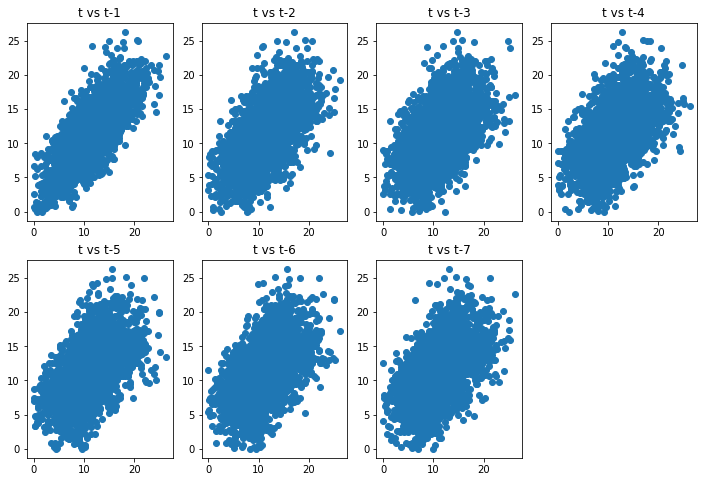

In [69]:
plt.figure(figsize=(12,8))

for i in range(1,8):
    ax = plt.subplot(240 + i)
    ax.set_title('t vs t-' + str(i))
    plt.scatter(df.Temp, df["t - " + str(i)])
plt.show()

* Running the example suggests the strongest relationship between an observation with its
lag=1 value, but generally a good positive correlation with each value in the last week.

### Autocorrelation Plots

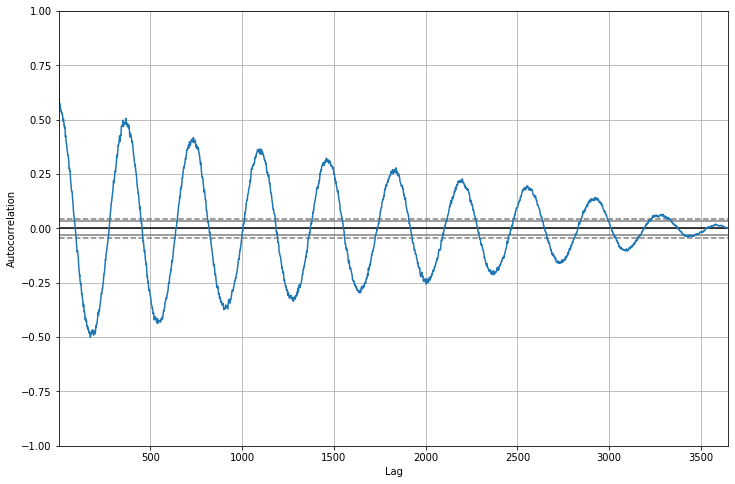

In [70]:
from pandas.plotting import autocorrelation_plot

df = pd.read_csv('Data/daily-min-temperatures.csv', index_col=0, parse_dates=True)

plt.figure(figsize=(12,8))
autocorrelation_plot(df);

* The resulting plot shows lag along the x-axis and the correlation on the y-axis. Dotted lines
are provided that indicate any correlation values above those lines are statistically signicant
(meaningful). We can see that for the Minimum Daily Temperatures dataset we see cycles of
strong negative and positive correlation. This captures the relationship of an observation with
past observations in the same and opposite seasons or times of year. Sine waves like those seen
in this example are a strong sign of seasonality in the dataset.

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv")

In [ ]:
df.to_csv("Data/daily-min-temperatures.csv", index=False)